In [1]:
# This code chunk will import all the necessarylibraries used in the project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.subplots as sp 
import plotly.figure_factory as ff
import datetime as dt
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
from wordcloud import WordCloud
from pandas_profiling import ProfileReport
import ipywidgets
import plotly.express as px
from plotly.express import funnel

In [2]:
pizza = pd.read_csv(r"pizza.csv",encoding='latin1')

## Exploratory Analysis

Checking Information of Dataset

In [3]:
profile = ProfileReport(pizza)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Checking Description of Dataset

In [21]:
print ("Rows     : " ,pizza.shape[0])
print ("Columns  : " ,pizza.shape[1])
print ("\nFeatures : \n" ,pizza.columns.tolist())
print ("\nUnique values :  \n",pizza.nunique())

Rows     :  48620
Columns  :  14

Features : 
 ['cust_id', 'order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time', 'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients', 'Sales']

Unique values :  
 cust_id              4207
order_details_id    48620
order_id            21350
pizza_id               91
quantity                4
date                  358
time                16382
pizza_type_id          32
size                    5
price                  25
name                   32
category                4
ingredients            32
Sales                  56
dtype: int64


## Dealing with blank/null values

In [22]:
#This code checks for any blank value and replaces that to null value
pizza = pizza.replace(" ", np.NaN)
pizza.head()

,cust_id,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,Sales
0,15199,1,1,hawaiian_m,1,01-01-2015,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,14898,2,2,classic_dlx_m,1,01-01-2015,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,16802,3,2,five_cheese_l,1,01-01-2015,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,10990,4,2,ital_supr_l,1,01-01-2015,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,13966,5,2,mexicana_m,1,01-01-2015,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [23]:
#This code checks for all the null values in all the variables
pizza.isnull().sum()

cust_id             0
order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
Sales               0
dtype: int64

In [24]:
#This code checks the shape of the dataset(rows,columns)
pizza.shape

(48620, 14)

In [36]:
# Convert date to datetime format
pizza['date'] = pd.to_datetime(pizza['date'])

In [37]:
# This code will calculate sales
pizza['Sales'] = pizza['quantity'] * pizza['price']
# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = pizza.set_index('date')['Sales'].resample('M').sum()

## Segmentation Analysis

In [38]:
#This code checks the sale of pizzas of different categories(Represents total no of pizzas sold in each category)
pizza.category.value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

In [39]:
#This code chunk will tell the total sales by pizza categories 
grouped = pizza.groupby('category').sum().reset_index()
grouped = grouped.sort_values('price', ascending=False).reset_index()

grouped.drop('index', axis=1, inplace=True)
grouped = grouped.head(15)
fig = px.pie(grouped, values="price", names="category",template="seaborn")

fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [40]:
#This code will slice out pizza category's details into different dataframes. 
classic_pizza=pizza[pizza.category=='Classic']
supreme_pizza=pizza[pizza.category=='Supreme']
veggie_pizza=pizza[pizza.category=='Veggie']
chicken_pizza=pizza[pizza.category=='Chicken']

Checking Price Distribution of all categories of pizza

In [41]:
classic_pizza.price.describe()

count    14579.000000
mean        14.797490
std          3.962018
min          9.750000
25%         12.000000
50%         13.250000
75%         16.500000
max         35.950000
Name: price, dtype: float64

In [42]:
supreme_pizza.price.describe()

count    11777.000000
mean        17.363229
std          3.453130
min         12.250000
25%         16.250000
50%         16.500000
75%         20.750000
max         23.650000
Name: price, dtype: float64

In [43]:
veggie_pizza.price.describe()

count    11449.000000
mean        16.612639
std          2.946499
min         12.000000
25%         14.750000
50%         16.750000
75%         18.500000
max         21.000000
Name: price, dtype: float64

In [44]:
chicken_pizza.price.describe()

count    10815.000000
mean        17.709408
std          3.072835
min         12.750000
25%         16.750000
50%         16.750000
75%         20.750000
max         20.750000
Name: price, dtype: float64

In [45]:
#This code checks the sale of top 10 pizzas(Represents total no of pizzas sold)
pizza.name.value_counts()[:10]

The Classic Deluxe Pizza        2416
The Barbecue Chicken Pizza      2372
The Hawaiian Pizza              2370
The Pepperoni Pizza             2369
The Thai Chicken Pizza          2315
The California Chicken Pizza    2302
The Sicilian Pizza              1887
The Spicy Italian Pizza         1887
The Southwest Chicken Pizza     1885
The Four Cheese Pizza           1850
Name: name, dtype: int64

Text(0, 0.5, 'count')

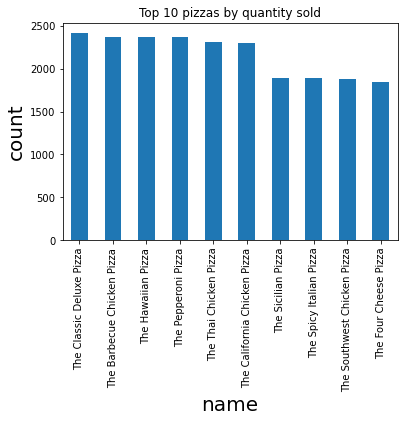

In [46]:
# top 10 pizzas recorded by count sales
nameplot=pizza['name'].value_counts()[:10].plot.bar(title='Top 10 pizzas by quantity sold')
nameplot.set_xlabel('name',size=20)
nameplot.set_ylabel('count',size=20)

In [47]:
#This code breaks down pizza categories to the pizza names level based on the total count of sales of each pizzas
plt.figure(figsize=(40,40));
fig = px.sunburst(pizza, path=['category', 'name'])
fig.show()

<Figure size 2880x2880 with 0 Axes>

## Time Series Analysis

In [48]:
#This code will show us the number of the pizzas sold on the monthly basis
order_count = pizza.set_index('date')['order_details_id'].resample('M').nunique()
order_count

date
2015-01-31    4288
2015-02-28    3821
2015-03-31    4251
2015-04-30    4182
2015-05-31    4008
2015-06-30    4044
2015-07-31    4212
2015-08-31    4141
2015-09-30    3780
2015-10-31    4045
2015-11-30    4226
2015-12-31    3622
Freq: M, Name: order_details_id, dtype: int64

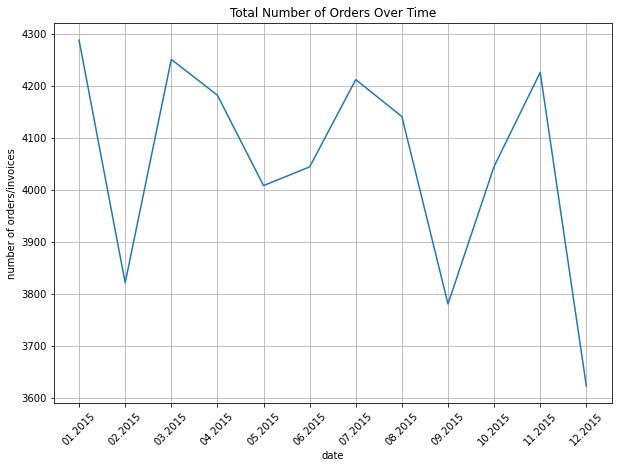

In [49]:
#The below code chunk will show us the line chart of pizzas sold every month
ax = pd.DataFrame(order_count.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(order_count.index)), 
    [x.strftime('%m.%Y') for x in order_count.index], 
    rotation=45
)

plt.show()

## Customer Analysis

In [50]:
#Calculation of the unique customers every month
unique_cust = pizza.set_index('date')['cust_id'].resample('M').nunique()
unique_cust

date
2015-01-31    2868
2015-02-28    2674
2015-03-31    2783
2015-04-30    2692
2015-05-31    2646
2015-06-30    2800
2015-07-31    2889
2015-08-31    2717
2015-09-30    2546
2015-10-31    2872
2015-11-30    2818
2015-12-31    2652
Freq: M, Name: cust_id, dtype: int64

Calculation of the repeated customers every month

In [51]:
#This code Aggregate the raw data for each Invoice No.
invoice_df = pizza.groupby(
    by=['order_details_id', 'date']
).agg({
    'price': sum,
    'cust_id': max,
    'category': max,
}).reset_index()
repeat_cust = invoice_df.set_index('date').groupby([
    pd.Grouper(freq='M'), 'cust_id'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['cust_id']
repeat_cust

date
2015-01-31    1036
2015-02-28     825
2015-03-31    1010
2015-04-30    1029
2015-05-31    1043
2015-06-30     907
2015-07-31     969
2015-08-31     943
2015-09-30     802
2015-10-31     924
2015-11-30    1048
2015-12-31     772
Freq: M, Name: cust_id, dtype: int64

In [52]:
#This code will compare the repeat and unique customers by month and calculate percentage by month
repeat_perct = repeat_cust/unique_cust*100.0
repeat_perct

date
2015-01-31    36.122734
2015-02-28    30.852655
2015-03-31    36.291771
2015-04-30    38.224368
2015-05-31    39.417989
2015-06-30    32.392857
2015-07-31    33.541018
2015-08-31    34.707398
2015-09-30    31.500393
2015-10-31    32.172702
2015-11-30    37.189496
2015-12-31    29.110106
Freq: M, Name: cust_id, dtype: float64

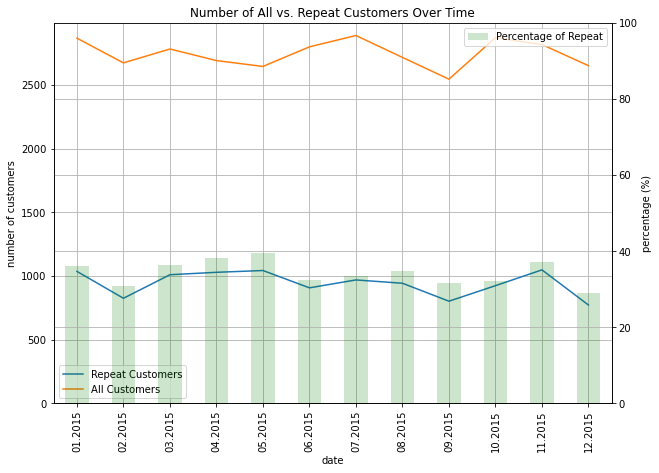

In [53]:
# This code will visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(repeat_cust.values).plot(
    figsize=(10,7))

pd.DataFrame(unique_cust.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(repeat_perct.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, unique_cust.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(repeat_cust.index)), 
    [x.strftime('%m.%Y') for x in repeat_cust.index], 
    rotation=45
)
plt.show()

Analysis: The relationship between monthly customer count and monthly average of returning customers is seen in the graph above. The orange line reflects the total number of customers, and the blue line the percentage of returning consumers. Here, we can see that the line graphs are almost identical, with November having the greatest total and repeat customer numbers and December & February having the lowest.
The spacing between the curves shows the significant difference between new consumers and returning clients.

In [54]:
# Monthly revenue of repeat customers
rev_repeat_cust = invoice_df.set_index('date').groupby([
    pd.Grouper(freq='M'), 'cust_id'
]).filter(lambda x: len(x) > 1).resample('M').sum()['price']

# Calculate the %
m_rev_perc_repeat_customers_df = rev_repeat_cust/m_revenue_df * 100.0
m_revenue_df

date
2015-01-31    71620.15
2015-02-28    64419.45
2015-03-31    71301.40
2015-04-30    70312.00
2015-05-31    67648.80
2015-06-30    68161.45
2015-07-31    70880.65
2015-08-31    69497.30
2015-09-30    63803.70
2015-10-31    68152.20
2015-11-30    71004.85
2015-12-31    61058.10
Freq: M, Name: Sales, dtype: float64

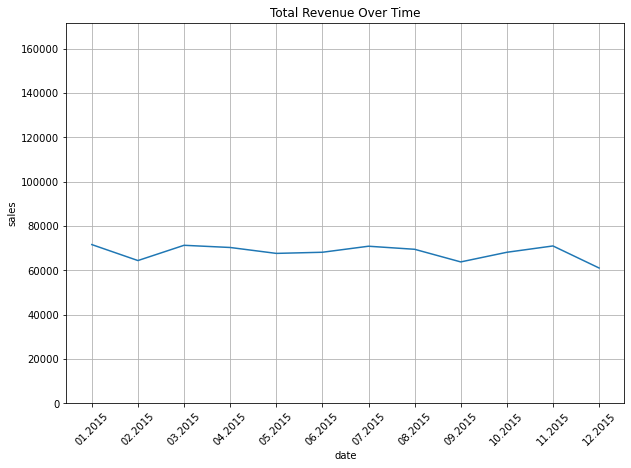

In [55]:
# This code will create a Line Plot for revenue
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(m_revenue_df.values)+100000])

plt.xticks(
    range(len(m_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in m_revenue_df.index], 
    rotation=45
)

plt.show()

Analysis: Both the quantity of orders and the general pattern of sales are very similar. The maximum value for both occurs in January & November. A total of ~$73k sales are predicted to have been made in November and January respectively.

# RFM Analysis

In [56]:
#This code will store a date as a reference point for recency calculations.
ref_date = dt.datetime(2015, 12, 31)

In [57]:
#This code will convert date to datetime format
pizza['date'] = pd.to_datetime(pizza['date'])

In [58]:
#This code will check Min and Max dates in the dataframe
print(pizza['date'].min())
print(pizza['date'].max())

2015-01-01 00:00:00
2015-12-31 00:00:00


In [59]:
#This code will show us the total speniding of each customer throughout the year
cust_spending = pizza.groupby(['cust_id']).agg({'price': lambda x: x.sum()}).reset_index()
cust_spending.head()

,cust_id,price
0,10000,256.50
1,10002,137.90
2,10004,131.45
3,10006,142.00
4,10010,145.90


In [60]:
#This code will make a new dataframe called as rfm by aggregating date, order_id and price total and group by customer id.  
rfm= pizza.groupby('cust_id').agg({'date': lambda date: (ref_date - date.max()).days,
                                    'order_id': lambda num: len(num),
                                        'price': lambda price: price.sum()})

In [61]:
rfm.head()

,date,order_id,price
cust_id,,,
10000,13,18,256.50
10002,16,9,137.90
10004,41,8,131.45
10006,13,9,142.00
10010,52,9,145.90


In [62]:
# This code will rename the columns in rfm dataframe
rfm.columns=['monetary','frequency','recency']

In [63]:
#This code will define the new renamed columns data values as integer.
rfm['recency'] = rfm['recency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(int)

In [64]:
rfm.head()

,monetary,frequency,recency
cust_id,,,
10000,13,18,256
10002,16,9,137
10004,41,8,131
10006,13,9,142
10010,52,9,145


In [65]:
#Since the names of columns are not in proper order, this code will change the column names respectively.
rfm.columns=['recency','frequency','monetary']

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

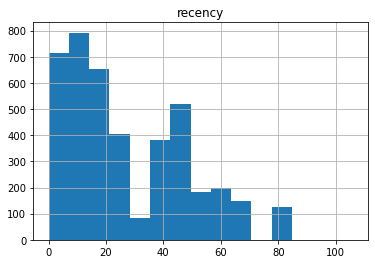

In [66]:
#This code will create a histogram for Recency Data.
rfm.hist(column='recency', bins=15)

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

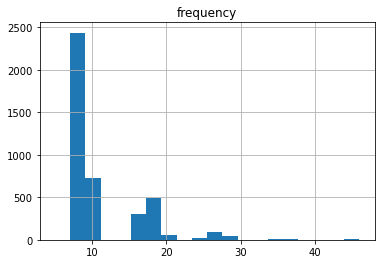

In [67]:
#This code will create a histogram for frequency Data.
rfm.hist(column='frequency', bins=20)

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

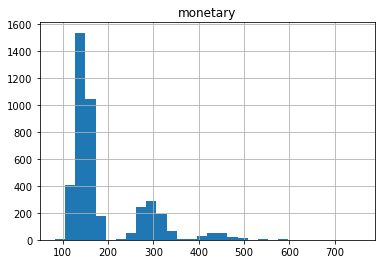

In [68]:
#This code will create a histogram for monetory Data.
rfm.hist(column='monetary', bins=30)

In [69]:
#This will sort the customers whose spending in an year is less that $150
rfm.sort_values(by=['monetary'], inplace=True)
rfm = rfm[rfm.monetary <150]
rfm.tail(100)

,recency,frequency,monetary
cust_id,,,
12350,13,9,148
17250,22,9,148
14405,16,9,148
13920,10,10,148
12877,28,9,148
...,...,...,...
15619,2,10,149
17039,52,9,149
19420,14,9,149


array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

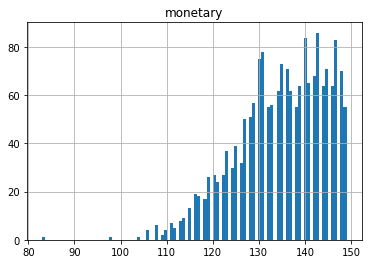

In [70]:
#This code will create a histogram for monetory Data where spending is less than $150.
rfm.hist(column='monetary', bins=100)

## Calculation of RFM Scores

In [71]:
#Through this code we will use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 19.0, 0.4: 29.0, 0.6: 43.0, 0.8: 50.0},
 'frequency': {0.2: 8.0, 0.4: 8.0, 0.6: 9.0, 0.8: 9.0},
 'monetary': {0.2: 127.0, 0.4: 133.0, 0.6: 139.0, 0.8: 144.0}}

In [72]:
#Through this code we will define functions to assign ranks from 1 to 5. Wherein, A lower Recency value is better and higher Frequency and Monetary values are better.  
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [73]:
#This code will calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [74]:
# This code will combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
cust_id,,,,,,,
15401,12,5,83,5,1,1,511
19878,30,8,98,3,1,1,311
13213,37,8,104,3,1,1,311
12272,43,8,106,3,1,1,311
19623,50,8,106,2,1,1,211


In [75]:
#This code will create the customer segments. I am creating 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
cust_id,,,,,,,,
15401,12,5,83,5,1,1,511,new customers
19878,30,8,98,3,1,1,311,needs attention
13213,37,8,104,3,1,1,311,needs attention
12272,43,8,106,3,1,1,311,needs attention
19623,50,8,106,2,1,1,211,at risk


In [76]:
segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

In [77]:
rfm

,recency,frequency,monetary,R,F,M,RFM Score,Segment
cust_id,,,,,,,,
15401,12,5,83,5,1,1,511,new customers
19878,30,8,98,3,1,1,311,needs attention
13213,37,8,104,3,1,1,311,needs attention
12272,43,8,106,3,1,1,311,needs attention
19623,50,8,106,2,1,1,211,at risk
...,...,...,...,...,...,...,...,...
15619,2,10,149,5,5,5,555,champions
17039,52,9,149,1,3,5,135,at risk
19420,14,9,149,5,3,5,535,champions


In [78]:
#This code will count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

new customers      263
needs attention    411
champions          493
at risk            709
Name: Segment, dtype: int64

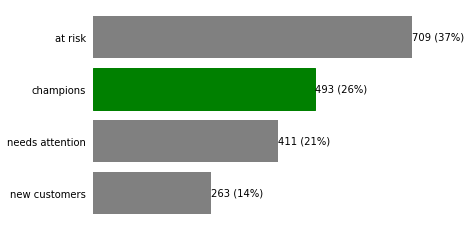

In [79]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [80]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
cust_id,,,,,,,,
17256,4,10,149,5,5,5,555,champions
13467,10,10,149,5,5,5,555,champions
10984,2,10,149,5,5,5,555,champions
18343,12,10,149,5,5,5,555,champions
15084,11,10,149,5,5,5,555,champions


In [81]:
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
cust_id,,,,,,,,
17039,52,9,149,1,3,5,135,at risk
10899,63,9,149,1,3,5,135,at risk
15360,68,9,149,1,3,5,135,at risk
11008,80,9,149,1,3,5,135,at risk
10659,68,9,149,1,3,5,135,at risk


In [82]:
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
cust_id,,,,,,,,
12908,81,8,111,1,1,1,111,at risk
16802,81,8,113,1,1,1,111,at risk
16091,81,8,114,1,1,1,111,at risk
14342,81,8,117,1,1,1,111,at risk
19432,81,8,117,1,1,1,111,at risk


In [83]:
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
cust_id,,,,,,,,
13728,18,9,149,5,3,5,535,champions
14536,4,10,149,5,5,5,555,champions
16680,15,9,149,5,3,5,535,champions
12397,28,9,149,4,3,5,435,champions
18986,4,10,149,5,5,5,555,champions


### Suggested Pizza prices of all pizza categories based on 21.06% inflation rate from 2015 to 2022

In [84]:
price = pd.read_csv(r"price.csv",encoding='latin1')

In [85]:
# This code will calculate new prices of all pizza categories
price['price_new'] = price['price'] + price['price']*0.2106
price

,pizza_name,price,price_new
0,The Barbecue Chicken Pizza Large,20.75,25.11995
1,The Barbecue Chicken Pizza Medium,16.75,20.27755
2,The Barbecue Chicken Pizza Small,12.75,15.43515
3,The Big Meat Pizza Small,12.00,14.52720
4,The Brie Carre Pizza Small,23.65,28.63069
...,...,...,...
86,The Thai Chicken Pizza Medium,16.75,20.27755
87,The Thai Chicken Pizza Small,12.75,15.43515
88,The Vegetables + Vegetables Pizza Large,20.25,24.51465
89,The Vegetables + Vegetables Pizza Medium,16.00,19.36960


## Insights from Analysis

• On Conducting the segmentation analysis, I analyzed that Category “Classic” has the highest number of pizzas sold throughout the year and “Chicken” is the least. Moreover, Classic constitutes 26.9% of the total no of pizzas sold proportionately

•	On closer analysis I figured out that pizzas falling under the “Chicken” category have the highest prices compared to classic pizza (being the least)

•	The hot-selling pizza of the Maven Store is “The Classic Deluxe Pizza” and the worst-selling pizza is “The Brie Carre Pizza”.

•	January and November are the months when the store makes the maximum sale and December is the worst. 

•	Surprisingly, January and July have the most unique customers and September being the least. 

•	November has the greatest number of repeat customers and December being the least.

•	The relationship between the monthly customer count and the monthly average of returning customers is seen in the graph above. The orange line reflects the total number of customers, and the blue line the percentage of returning consumers. Here, we can see that the line graphs are almost identical, with November having the greatest total and repeat customer numbers and December & February having the lowest. The spacing between the curves shows the significant difference between new consumers and returning clients.

•	Based on RFM Analysis and RFM score I figured out that 37% of the customers are at risk which is quite a big number. Whereas 26% of the customers don’t need attending and are loyal, and 21% of the customers need attention. 


## Marketing Strategies

1. Combos

Making combination package deals for different group sizes available on the carry-out menu makes ordering for customers incredibly simple. Combination offers are excellent since they provide the impression that the consumer is saving money, which may result in increased sales. Multiple combination offers can be produced and utilised to advertise new menu items. In addition to increasing revenue, this will also assist to manage operating expenses and attract new clients.

2. Coupon Offers

In terms of discounts and deal promotions, restaurants and pizzerias are arguably the most successful in the restaurant business.Maven Pizza can provide coupons, but they should only be valid for a short period of time, say in the months of September and December, as these two months have the lowest sales and the worst rates of acquiring repeat customers.
Using coupons has been shown to enhance customer foot traffic in establishments.

3. Segment Email Promotions

One of the most efficient and affordable methods for pizza companies to engage with their customers and remarket to them is to build a customer email list. Nurturing the email list with pertinent content is essential for engagement and conversion in order to guarantee high open and click-through rates. Lack of segmentation is one problem with many email marketing strategies. They frequently go by the name "email blasts," which has a negative impact on client engagement. Section your client email list so that you may send each segment personalised content and promotions.
As an example, after conducting RFM analyis we figured out customers with least RFM score and which fall under the "At Risk" category. We can email such customers with good promotion deals during the month of January and November where the store makes the maximum sale to balance the revenue by providing discounts and acquiring more customers.

4. Discounts to Unique customers.

Unique customers constitute about 30% of the totals every month on an average. Enabling reapeated visits from them can be a shooting point for the Maven Pizza. When it comes to placing a pizza order, people are creatures of habit. Customers are more likely to return if they enjoy both the pizza and the service. They also frequently recommend their pals! Once a preference has been established, Maven Pizza may build a loyal clientele. The majority of individuals will select a favourite and stick with it for a very long period. Maven Pizza will have a devoted client base for a very long time if they can continuously serve top quality cuisine and offer decent customer service.


5. Limited Time offers for repeated customers

A LTO with a lot of buzz may generate a tonne of revenue. By providing a unique menu item for a limited time only to regular clients, you may help keep them for a very long time by creating buzz, urgency, and profit. The offer need to correspond with seasonal occasions. For instance, if Maven is holding an LTO in November, you would want to think about making a crust with 